In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

 Завантажити Diabetes Dataset
Цей датасет містить 10 фізіологічних змінних (вік, стать, індекс маси
тіла, артеріальний тиск та інші) та одну цільову змінну, яка представляє
прогрес діабету через рік після вихідних даних.

In [ ]:
from google.colab import files
import pandas as pd
# Завантаження файлу
uploaded = files.upload()

df = pd.read_csv('diabetes.csv')
df


Saving diabetes.csv to diabetes.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


1. Вивести перших 5 рядків.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


2. Перевірити наявність пропусків. У разі виявлення замінити на
середнє значення.

In [ ]:
print(df.isnull().sum())

numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mean(), inplace=True)

print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


3. Перевірити наявність дублікатів, при виявленні – видалити

In [ ]:
print(df.duplicated().sum())

df = df.drop_duplicates()

print(df.duplicated().sum())

0
0


4. Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте
унікальні значення.

In [ ]:
-

5. Перевірити тип даних. При необхідності замінити тип даних на
числовий

In [ ]:
print(df.dtypes)

for column in df.columns:
    if df[column].dtype == 'object':
        try:
            df[column] = pd.to_numeric(df[column])
        except:
            pass

print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


6. Обчислити кореляцію між прогресом діабету і іншмим ознаками.
Розташувати в порядку спадання.

In [ ]:

df = pd.read_csv('diabetes.csv')
print("Стовпці у файлі:")
print(df.columns.tolist())
correlation = df.corr()['Outcome'].sort_values(ascending=False)
print("\nКореляція з Outcome (прогрес діабету):")
print(correlation)

Стовпці у файлі:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Кореляція з Outcome (прогрес діабету):
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


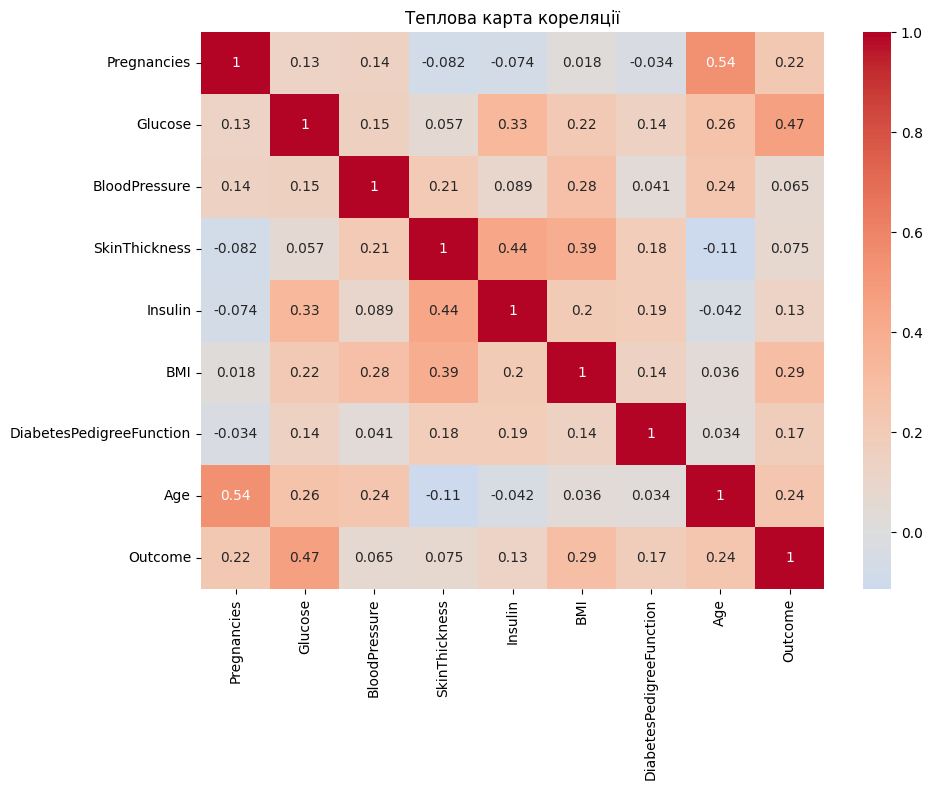

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Теплова карта кореляції')
plt.tight_layout()
plt.show()

7. Масштабувати ознаки.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Outcome', axis=1))

df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['Outcome'] = df['Outcome'].values

print(df_scaled.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  


8. Поділити дані на тренувальну і тестову вибірки.

In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('Outcome', axis=1)
y = df_scaled['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Розмір тренувальної вибірки: {X_train.shape}")
print(f"Розмір тестової вибірки: {X_test.shape}")

Розмір тренувальної вибірки: (614, 8)
Розмір тестової вибірки: (154, 8)


9. Побудувати модель лінійной регресії і RandomForest регресії на
основі більш корелюючих ознак (підібрати оптимальне число).

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
top_features = correlation[1:4].index.tolist()
print(f"Обрані ознаки: {top_features}")

X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]
lr = LinearRegression()
lr.fit(X_train_selected, y_train)
y_pred_lr = lr.predict(X_test_selected)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_selected, y_train)
y_pred_rf = rf.predict(X_test_selected)

print("Linear Regression:")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.4f}")
print(f"R2: {r2_score(y_test, y_pred_lr):.4f}")

print("\nRandom Forest Regression:")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.4f}")
print(f"R2: {r2_score(y_test, y_pred_rf):.4f}")

Обрані ознаки: ['Glucose', 'BMI', 'Age']
Linear Regression:
MSE: 0.1858
R2: 0.1908

Random Forest Regression:
MSE: 0.1847
R2: 0.1953


10. Вивести коефіцієнт детермінації і середньоквадратичну помилку

In [ ]:
print("Linear Regression:")
print(f"R2: {r2_score(y_test, y_pred_lr):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.4f}")

print("\nRandom Forest Regression:")
print(f"R2: {r2_score(y_test, y_pred_rf):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.4f}")

Linear Regression:
R2: 0.1908
MSE: 0.1858

Random Forest Regression:
R2: 0.1953
MSE: 0.1847


11. Побудувати графіки.


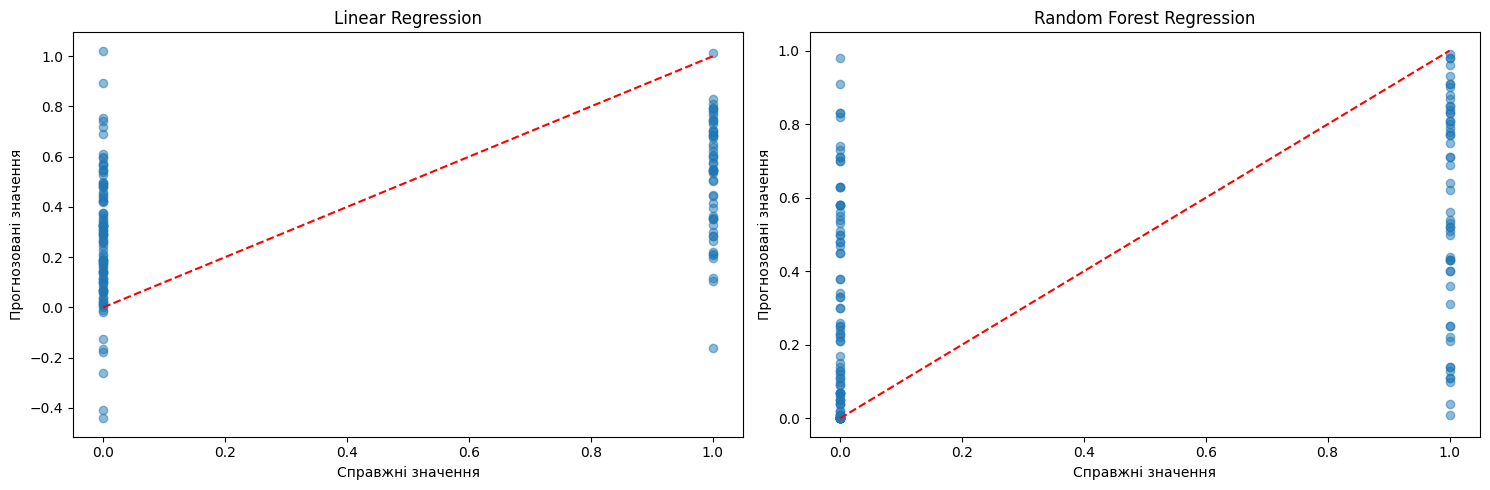

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Linear Regression')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Random Forest Regression')

plt.tight_layout()
plt.show()

12. Вивести справжні і прогнозовані значення.

In [ ]:
results = pd.DataFrame({
    'Справжні': y_test.values,
    'Прогноз LR': y_pred_lr,
    'Прогноз RF': y_pred_rf
})

print(results.head(10))

   Справжні  Прогноз LR  Прогноз RF
0         0    0.329833        0.51
1         0    0.262707        0.38
2         0    0.171432        0.01
3         0    0.175816        0.05
4         0    0.527166        0.70
5         0    0.499959        0.48
6         0   -0.167018        0.00
7         0    0.436013        0.71
8         0    0.545097        0.21
9         0    0.753423        0.83


У ході виконання роботи було завантажено та проаналізовано набір даних Diabetes Dataset. За допомогою програмного коду здійснено перегляд перших рядків, перевірку пропусків та дублікатів, а також коректну обробку бінарних і числових ознак. Розраховано кореляцію, що дозволило виділити найбільш значущі змінні для прогнозування прогресу діабету.

Після масштабування дані було поділено на тренувальну й тестову вибірки. На основі реалізованого коду побудовано моделі лінійної регресії та RandomForestRegressor. Порівняння метрик (R² і MSE) показало, що модель випадкового лісу працює точніше, краще відтворюючи залежності у даних. Графіки та виведені реальні й прогнозовані значення підтверджують адекватність моделювання.

Отже, робота з кодом продемонструвала ефективність етапів попередньої обробки даних та перевагу ансамблевих методів у задачах регресії.